### SLow down that robot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import grid_analysis as griddy

folder = 'rat_data_test_run'
degree = 5

simulation length: 3.0 mins = 180000 ms
rat_180000ms_2022-05-09_11:12:53_gain_2000


In [2]:
posedata = pandas.read_csv(f'data/{folder}/{folder}.csv')

0.8287809256121695


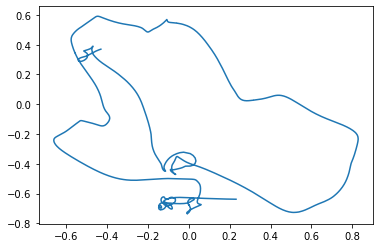

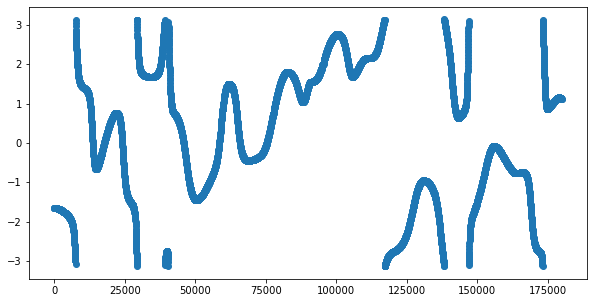

In [14]:
pos_t = np.array(np.around(posedata['Time']*1000))
pos_x = np.array(posedata['X'])
pos_y = np.array(posedata['Y'])
theta = np.array(posedata['Theta'])

skip = 1000
pos_x = pos_x[skip:]
pos_y = pos_y[skip:]
pos_t = pos_t[:len(pos_x)]
theta = theta[skip:]

temp_t = pos_t[::degree]
pos_x = pos_x[:len(temp_t)]
pos_y = pos_y[:len(temp_t)]
theta = theta[:len(temp_t)]

x = temp_t
pos_t = pos_t[:len(temp_t)]

y = theta
theta = np.interp(pos_t, x, y)
y = pos_x
pos_x = np.interp(pos_t, x, y)
y = pos_y
pos_y = np.interp(pos_t, x, y)

theta = ( theta + np.pi) % (2 * np.pi ) - np.pi

pos_x = pos_x[pos_t<sim_len]
pos_y = pos_y[pos_t<sim_len]
theta = theta[pos_t<sim_len]
pos_t = pos_t[pos_t<sim_len]


dt = int(np.average(np.diff(pos_t)))
t = pos_t
time = [i * 1. for i in t if i < sim_len]

plt.plot(pos_x[:len(time)],pos_y[:len(time)])
plt.figure(figsize=(10,5))
plt.scatter(time,theta[:len(time)])

In [4]:
d = {'Time': pos_t, 'X':pos_x, 'Y':pos_y, 'Theta':theta}
df = pd.DataFrame(data=d)
os.makedirs(f'data/{folder}_1-{degree}')
df.to_csv(f'data/{folder}_1-{degree}/{folder}_1-{degree}.csv')